# Preprocessing data

### Note: All the data we will work with in this workshop is just a sample of data that you will be given during the event itself!

## Some package imports

In [1]:
!pip install -U -q datalearn19intro
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datalearn19intro import get_accounts, get_events, get_subscriptions, get_users
%matplotlib inline

## Reading the data

In [2]:
accounts = get_accounts()
users = get_users()
events = get_events()
subscriptions = get_subscriptions()

In [3]:
df = \
         pd.merge(pd.merge(accounts, users, on = 'account_id', how = 'outer', suffixes = ('_fromaccounts', '_fromusers')),
         pd.merge(events, subscriptions, on = 'account_id', how = 'outer', suffixes = ('_fromevents', '_fromsubscriptions')),
         how = 'outer', on = ['user_id', 'account_id'])

In [4]:
df.shape

(11687, 108)

In [5]:
n_rows = len(df)
n_cols = len(df.columns)

In [6]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 200)

In [7]:
df.head(10)

,account_id,marketing_source,marketing_referrer,created_at_fromaccounts,plan_id_x,trial_start,started_plan_at,signup_box_origin,churn_state,churn_date,churn_reason,time_diff_fromaccounts,region_fromaccounts,country_fromaccounts,subscription_started_at,paying,is_gmail_fromaccounts,has_logo,free_users,marketing_banner,device_fromaccounts,os_fromaccounts,browser_fromaccounts,collection_21_days,trial_period,company_size,next_charge_date_x,last_upgrade_promotion_start,cs_agent,sales_agent,disabled,payment_currency,disable_promotion,max_team_size,min_team_size,cancellation_on_renewal_date,partner_id,industry,billed_users_count,utm_cluster_id,pricing_version,has_domain,mrr,lead_score,industry.1,team_size,user_goal,user_description,sub_industry,user_id,created_at_fromusers,is_admin,pending,enabled,became_active_at,time_diff_fromusers,city,region_fromusers,country_fromusers,serial_number,has_photo,device_fromusers,os_fromusers,browser_fromusers,is_gmail_fromusers,campaign_id,first_user_in_account_id,LANGUAGE,gender,seniority,title,mobile_activation_date,has_phone,DATE,total_events,column_events,board_events,num_of_boards,count_kind_columns,raw_events,group_events,invite_events,import_events,notification_events,new_entry_events,payment_events,inbox_events,communicating_events,non_communicating_events,web_events,ios_events,android_events,desktop_app_events,empty_events,event_date,plan_id_y,event_type,invoice_charge_amount,prev_plan_id,status,status_reason,currency,invoice_charge_amount_usd,mrr_gain,subscription_id,next_charge_date_y,payment_type,transaction_date
0,2793496,bing,https://www.bing.com/search?q=basecamp login,2019-01-01,nan,2019-01-01,NaN,NaN,none,NaN,nan,11.00,New South Wales,AU,NaN,0.00,1.00,1.00,nan,NaN,desktop,windows,microsoft edge,0.00,14.00,nan,NaN,nan,nan,nan,nan,AUD,0.00,5.00,2.00,nan,nan,NaN,0.00,orders,3.00,0.00,nan,0.00,NaN,NaN,nan,nan,nan,6181341,2018-12-31,1.00,0.00,1.00,2019-01-01,11.00,Warrawee,New South Wales,AU,1.00,1.00,desktop,windows,microsoft edge,1.00,"4,005,514.00","29,837,820.00",NaN,M,NaN,NaN,NaN,1.00,2019-01-01,43.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,2.00,33.00,0.00,0.00,0.00,7.00,NaN,nan,NaN,nan,nan,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,NaN
1,2793496,bing,https://www.bing.com/search?q=basecamp login,2019-01-01,nan,2019-01-01,NaN,NaN,none,NaN,nan,11.00,New South Wales,AU,NaN,0.00,1.00,1.00,nan,NaN,desktop,windows,microsoft edge,0.00,14.00,nan,NaN,nan,nan,nan,nan,AUD,0.00,5.00,2.00,nan,nan,NaN,0.00,orders,3.00,0.00,nan,0.00,NaN,NaN,nan,nan,nan,6181341,2018-12-31,1.00,0.00,1.00,2019-01-01,11.00,Warrawee,New South Wales,AU,1.00,1.00,desktop,windows,microsoft edge,1.00,"4,005,514.00","29,837,820.00",NaN,M,NaN,NaN,NaN,1.00,2019-01-05,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,nan,NaN,nan,nan,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,NaN
2,2793496,bing,https://www.bing.com/search?q=basecamp login,2019-01-01,nan,2019-01-01,NaN,NaN,none,NaN,nan,11.00,New South Wales,AU,NaN,0.00,1.00,1.00,nan,NaN,desktop,windows,microsoft edge,0.00,14.00,nan,NaN,nan,nan,nan,nan,AUD,0.00,5.00,2.00,nan,nan,NaN,0.00,orders,3.00,0.00,nan,0.00,NaN,NaN,nan,nan,nan,6181341,2018-12-31,1.00,0.00,1.00,2019-01-01,11.00,Warrawee,New South Wales,AU,1.00,1.00,desktop,windows,microsoft edge,1.00,"4,005,514.00","29,837,820.00",NaN,M,NaN,NaN,NaN,1.00,2019-01-02,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,nan,NaN,nan,nan,NaN,NaN,NaN,nan,nan,nan,NaN,NaN,NaN
3,2793496,bing,https://www.bing.com/search?q=basecamp login,2019-01-01,nan,2019-01-01,NaN,NaN,none,NaN,nan,11.00,New South Wales,AU,NaN,0.00,1.00,1.00,nan,NaN,desktop,windows,microsoft edge,0.00,14.00,nan,NaN,nan,nan,nan,nan,AUD,0.00,5.00,2.00,nan,nan,NaN,0.00,orders,3.00,0.00,nan,0.00,NaN,NaN,nan,nan,nan,6181341,2018-12-31,1.00,0.00,1.00,2019-01-01,11.00,Warrawee,New South Wales,AU,1.00,1.00,desktop,windows,microsoft edge,1.00,"4,005,514.00","29,837,820.00

In [8]:
# joined_data.nunique()

**Notice:** Because of the join operation we now have much more rows than accounts, which are the actual entries in our dataset. We will see how to get back to one-row-per-account soon.

# Imputation

## Dropping featues with too much missing data

`dropna()` is an important `pandas` method. Use `axis=1` to drop columns and `axis=0`; `how` can be used to drop a row or column if it has `any` or `all` missing values. Use `thresh` to define an integer threshold for **non-missing** values instead.

In [9]:
import math

In [10]:
AT_LEAST_NON_MISSING_PERCENT = 0.7  # require at most 30% missing values per feature

In [11]:
AT_LEAST_NON_MISSING = math.floor(AT_LEAST_NON_MISSING_PERCENT * len(df))
AT_LEAST_NON_MISSING

8180

In [12]:
df.dropna(axis=1, thresh=AT_LEAST_NON_MISSING, inplace=True)

In [13]:
len(df.columns)

64

In [14]:
print("{} columns dropped.".format(n_cols - len(df.columns)))

44 columns dropped.


We went from 108 to 64 features!

## Dropping rows with too much missing data

In [15]:
AT_LEAST_NON_MISSING_PERCENT_ROWS = 0.5  # require at most 50% missing values per row

In [16]:
AT_LEAST_NON_MISSING_ROW = math.floor(AT_LEAST_NON_MISSING_PERCENT_ROWS * len(df.columns))
AT_LEAST_NON_MISSING_ROW

32

In [17]:
df.dropna(axis=0, thresh=AT_LEAST_NON_MISSING_ROW, inplace=True)

In [18]:
len(df)

11422

In [19]:
print("{} rows dropped.".format(n_rows - len(df)))

265 rows dropped.


## Dummy "missing" flag

In [20]:
df.nunique()[df.nunique() < 11]

created_at_fromaccounts     1
churn_state                 2
paying                      2
is_gmail_fromaccounts       2
has_logo                    1
device_fromaccounts         3
os_fromaccounts             6
browser_fromaccounts        7
trial_period                1
payment_currency            5
disable_promotion           2
max_team_size               9
min_team_size              10
billed_users_count          8
pricing_version             1
has_domain                  2
lead_score                  2
is_admin                    2
pending                     2
enabled                     2
has_photo                   1
device_fromusers            3
os_fromusers                6
is_gmail_fromusers          2
gender                      2
has_phone                   1
notification_events        10
dtype: int64

In [21]:
df.browser_fromaccounts.value_counts()

chrome               6725
safari               1268
generic browser       770
firefox               565
microsoft edge        287
opera                  66
internet explorer      14
Name: browser_fromaccounts, dtype: int64

We won't see missing value counts like this. We need to add an argument:

In [22]:
df.browser_fromaccounts.value_counts(dropna=False)

chrome               6725
NaN                  1727
safari               1268
generic browser       770
firefox               565
microsoft edge        287
opera                  66
internet explorer      14
Name: browser_fromaccounts, dtype: int64

One option is to put a special flag for missing:

In [23]:
filled_browser = df.browser_fromaccounts.fillna('missing')

In [24]:
filled_browser.value_counts()

chrome               6725
missing              1727
safari               1268
generic browser       770
firefox               565
microsoft edge        287
opera                  66
internet explorer      14
Name: browser_fromaccounts, dtype: int64

But in this case, just putting this into the `generic browser` category might not be a bad idea.

In [25]:
filled_browser = df.browser_fromaccounts.fillna('generic browser')

In [26]:
filled_browser.value_counts()

chrome               6725
generic browser      2497
safari               1268
firefox               565
microsoft edge        287
opera                  66
internet explorer      14
Name: browser_fromaccounts, dtype: int64

Let's just go with `missing` for this one, though...

In [27]:
df.browser_fromaccounts = df.browser_fromaccounts.fillna('missing')

In [28]:
df.browser_fromaccounts.value_counts()

chrome               6725
missing              1727
safari               1268
generic browser       770
firefox               565
microsoft edge        287
opera                  66
internet explorer      14
Name: browser_fromaccounts, dtype: int64

## Filling missing value with the mean/median/mode...

Let's find a numerical feature with enough missing data...

In [29]:
df.columns[(df.nunique() > 50) & (df.isna().sum() > 50)]

Index(['marketing_referrer', 'region_fromaccounts', 'country_fromaccounts',
       'became_active_at', 'city', 'region_fromusers', 'country_fromusers',
       'campaign_id', 'first_user_in_account_id', 'total_events',
       'column_events', 'raw_events', 'non_communicating_events', 'web_events',
       'ios_events', 'android_events', 'desktop_app_events'],
      dtype='object')

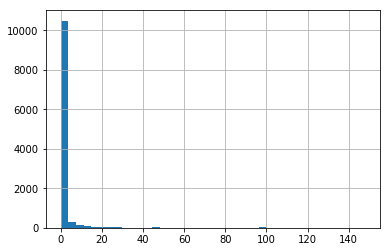

In [30]:
df.raw_events.hist(bins=40)

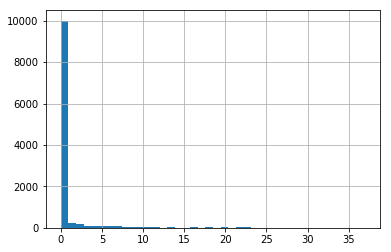

In [31]:
df.raw_events[df.raw_events<40].hist(bins=40)

In [32]:
df.raw_events.isna().sum()

99

In [33]:
df.raw_events.mean()

1.532456062880862

This is an integer feature, though! No sense in putting a real number as a stand-in. Let's look at the mode and median instead. Recall these are outlier-robust and skewness-robust statistics, and the distribution above seems very skewed...

In [34]:
df.raw_events.median()

0.0

In [35]:
df.raw_events.mode()

0   0.00
dtype: float64

Filling missing values with zeros makes **a lot** of sense, in this case.

In [36]:
df.raw_events.fillna(value=0, inplace=True)

In [37]:
df.raw_events.isna().sum()

0

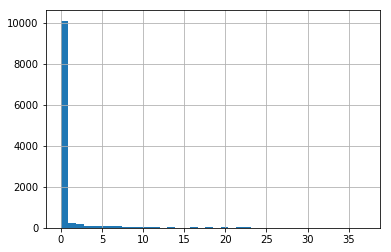

In [38]:
df.raw_events[df.raw_events<40].hist(bins=40)

#### Back to the presentation! We now discuss handling outliers...

# Handling outliers

## Feature-wise outliers

In [39]:
tdif = df.time_diff_fromaccounts.dropna()

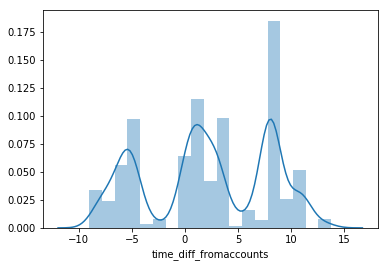

In [40]:
sns.distplot(tdif)

Doesn't look very normal...

In [41]:
from scipy.stats import norm

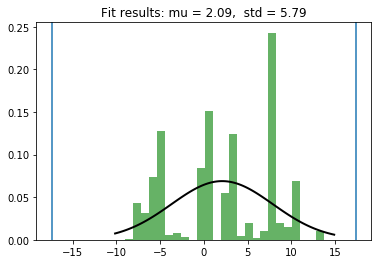

In [42]:
mu, std = norm.fit(tdif)
# Plot the histogram.
plt.hist(tdif, bins=25, density=True, alpha=0.6, color='g')
# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
# plot outlier boundaries
plt.axvline(x=std*3)
plt.axvline(x=-std*3)
plt.show()

This still doesn't look normal at all, so we won't use the three-standard-deviation rule for outlier removal in this case. In less obvious cases, it is better to use a normality test.

In [43]:
from IPython.display import Image
Image(url="https://upload.wikimedia.org/wikipedia/commons/3/3a/Standard_deviation_diagram_micro.svg")

Let's look at another one...

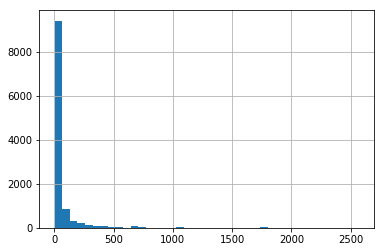

In [44]:
df.total_events.hist(bins=40)

This is a feature with a very skewed, long-tailed distribution. Forgoing scaling for now, we can mitigate the effect of outliers in this feature by trimming it to some max value. In this case 1000 or 500 looks reasonable.

In [45]:
df.total_events = df.total_events.apply(lambda x: x if x <= 500 else 500)

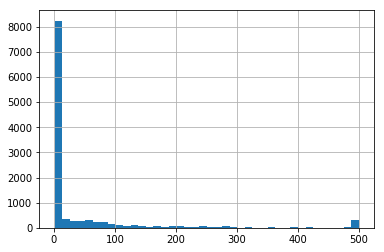

In [46]:
df.total_events.hist(bins=40)

## Overall outliers

There are many ways to detect outlies in your data. We will demonstrate just one.

But first, let's project our data to two dimensions, for ease of presentation. We'll use a common method to do just that, named t-SNE, **without explaining it at all**:

In [47]:
import time
from sklearn.manifold import TSNE

In [48]:
ndf = df.select_dtypes('number')
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(ndf.fillna(0).values)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 11422 samples in 0.045s...
[t-SNE] Computed neighbors for 11422 samples in 0.594s...
[t-SNE] Computed conditional probabilities for sample 1000 / 11422
[t-SNE] Computed conditional probabilities for sample 2000 / 11422
[t-SNE] Computed conditional probabilities for sample 3000 / 11422
[t-SNE] Computed conditional probabilities for sample 4000 / 11422
[t-SNE] Computed conditional probabilities for sample 5000 / 11422
[t-SNE] Computed conditional probabilities for sample 6000 / 11422
[t-SNE] Computed conditional probabilities for sample 7000 / 11422
[t-SNE] Computed conditional probabilities for sample 8000 / 11422
[t-SNE] Computed conditional probabilities for sample 9000 / 11422
[t-SNE] Computed conditional probabilities for sample 10000 / 11422
[t-SNE] Computed conditional probabilities for sample 11000 / 11422
[t-SNE] Computed conditional probabilities for sample 11422 / 11422
[t-SNE] Mean sigma: 22.291060
[t-SNE] KL divergen

In [49]:
tsne = df[['account_id']].copy(deep=True)
tsne['tsne-2d-one'] = tsne_results[:,0]
tsne['tsne-2d-two'] = tsne_results[:,1]

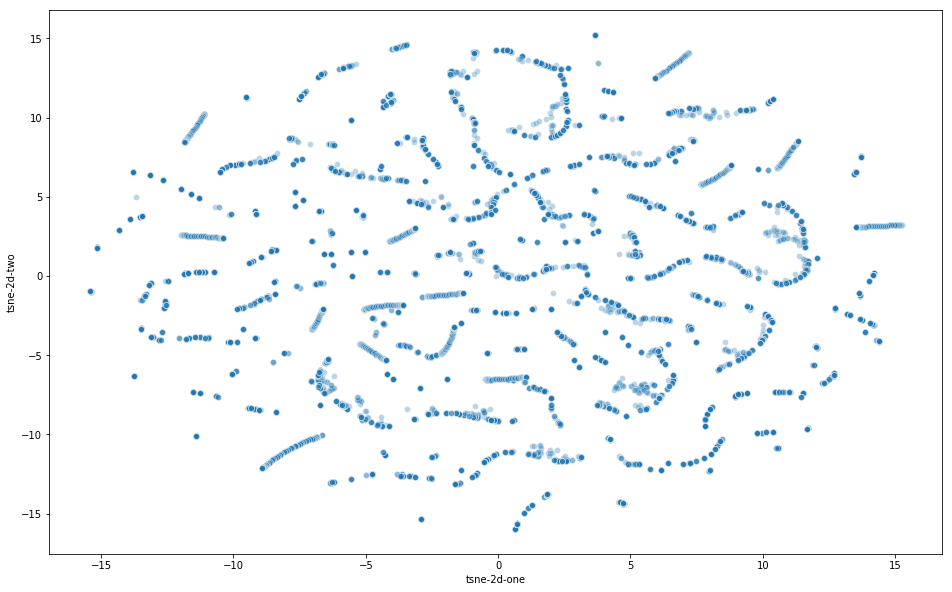

In [50]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette("hls", 10),
    data=tsne,
    legend="full",
    alpha=0.3
)

We had to use only numeric data and very stupidly fill all NaNs with zero just to use this, but you should really do this **AFTER** most if not all of your feature engineering pipeline - especially scaling - so all your data is numeric, and possibly also NaN-less (if you're using a method that doesn't handle NaN input).

In [51]:
len(ndf)

11422

We will use a method called *isolation forest*, again with **absolutely no explantion**, because we simply don't have the time. [Read more about it here](https://towardsdatascience.com/outlier-detection-with-isolation-forest-3d190448d45e).

In [52]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest(max_samples=100000, random_state=42)
y_pred = clf.fit_predict(ndf.fillna(0))

/Users/shaypalachy/.pyenv/versions/3.6.5/envs/py3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/Users/shaypalachy/.pyenv/versions/3.6.5/envs/py3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/Users/shaypalachy/.pyenv/versions/3.6.5/envs/py3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:250: UserWarning: max_samples (100000) is greater than the total number of samples (11422). max_samples will be set to n_samples for estimation.
  % (self.max_samples, n_samples))
/Users/shaypalachy/.pyenv/versions/3.6.5/envs/py3/lib/python3.6/site-packages/sklearn/ensemble/iforest.py:417: DeprecationW

In [53]:
tsne['outlier'] = y_pred

In [54]:
np.unique(y_pred, return_counts=True)

(array([-1,  1]), array([ 1141, 10281]))

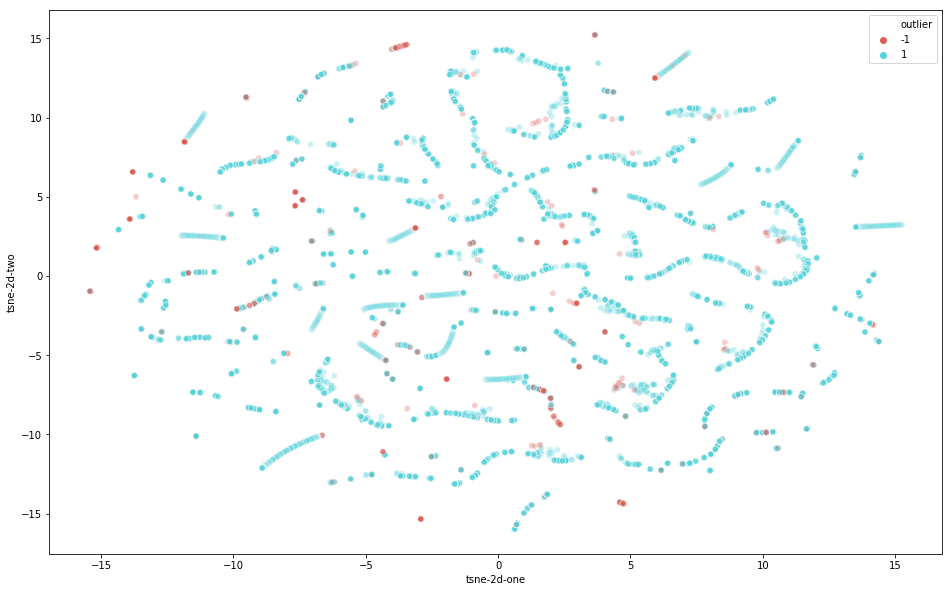

In [55]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="outlier",
    palette=sns.color_palette("hls", 2),
    data=tsne,
    legend="full",
    alpha=0.3
)

We can now drop outliers by utlizing the fact that our helper dataframe, `tsne`, has the same index as our dataset dataframe, since it's started as a copy of it; this would have worked whatever index we had, and does not rely on the fact the index is simply 0...11438.

In [56]:
inlier_indices = tsne[tsne.outlier == 1].index
len(inlier_indices)

10281

In [57]:
# This line would throw away all outliers; feel free to uncomment it
# df = df.loc[inlier_indices]

### Note: In the context of training prediction models, it is important to remove outliers only in your training set, and not the subset kept for testing/estimating model performance!

#### Back to the presentation! We now discuss scaling and normalization...

# Scaling and normalization

Let's find a numeric feature to scale.

In [58]:
ndf = df.select_dtypes('number')

In [59]:
ndf.head(4)

,account_id,time_diff_fromaccounts,paying,is_gmail_fromaccounts,has_logo,collection_21_days,trial_period,disable_promotion,max_team_size,min_team_size,billed_users_count,pricing_version,has_domain,lead_score,user_id,is_admin,pending,enabled,time_diff_fromusers,serial_number,has_photo,is_gmail_fromusers,campaign_id,first_user_in_account_id,has_phone,total_events,column_events,board_events,num_of_boards,count_kind_columns,raw_events,group_events,invite_events,import_events,notification_events,new_entry_events,payment_events,inbox_events,communicating_events,non_communicating_events,web_events,ios_events,android_events,desktop_app_events,empty_events
0,2793496,11.00,0.00,1.00,1.00,0.00,14.00,0.00,5.00,2.00,0.00,3.00,0.00,0.00,6181341,1.00,0.00,1.00,11.00,1.00,1.00,1.00,"4,005,514.00","29,837,820.00",1.00,43.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,2.00,33.00,0.00,0.00,0.00,7.00
1,2793496,11.00,0.00,1.00,1.00,0.00,14.00,0.00,5.00,2.00,0.00,3.00,0.00,0.00,6181341,1.00,0.00,1.00,11.00,1.00,1.00,1.00,"4,005,514.00","29,837,820.00",1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2793496,11.00,0.00,1.00,1.00,0.00,14.00,0.00,5.00,2.00,0.00,3.00,0.00,0.00,6181341,1.00,0.00,1.00,11.00,1.00,1.00,1.00,"4,005,514.00","29,837,820.00",1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2793496,11.00,0.00,1.00,1.00,0.00,14.00,0.00,5.00,2.00,0.00,3.00,0.00,0.00,6181341,1.00,0.00,1.00,11.00,1.00,1.00,1.00,"4,005,514.00","29,837,820.00",1.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [60]:
ndf.describe()

,account_id,time_diff_fromaccounts,paying,is_gmail_fromaccounts,has_logo,collection_21_days,trial_period,disable_promotion,max_team_size,min_team_size,billed_users_count,pricing_version,has_domain,lead_score,user_id,is_admin,pending,enabled,time_diff_fromusers,serial_number,has_photo,is_gmail_fromusers,campaign_id,first_user_in_account_id,has_phone,total_events,column_events,board_events,num_of_boards,count_kind_columns,raw_events,group_events,invite_events,import_events,notification_events,new_entry_events,payment_events,inbox_events,communicating_events,non_communicating_events,web_events,ios_events,android_events,desktop_app_events,empty_events
count,"11,422.00","9,686.00","11,422.00","11,422.00","11,422.00","11,422.00","11,422.00","11,422.00","9,260.00","9,260.00","11,422.00","11,422.00","11,422.00","11,422.00","11,422.00","11,422.00","11,422.00","11,422.00","9,036.00","11,422.00","11,422.00","11,422.00","9,024.00","9,637.00","11,422.00","11,422.00","11,323.00","11,323.00","11,323.00","11,323.00","11,422.00","11,323.00","11,323.00","11,323.00","11,323.00","11,323.00","11,323.00","11,323.00","11,323.00","11,323.00","11,323.00","11,323.00","11,323.00","11,323.00","11,323.00"
mean,"2,794,045.76",2.09,0.16,0.57,1.00,68.28,14.00,0.08,35.32,22.59,0.87,3.00,0.47,0.05,"6,201,831.57",0.69,0.16,0.83,0.82,4.81,1.00,0.61,"3,932,275.26","28,730,413.27",1.00,44.40,3.67,0.20,0.50,0.40,1.52,0.15,0.09,0.47,0.04,0.50,0.15,0.45,0.39,9.56,34.41,4.51,2.48,1.39,1.87
std,268.15,5.79,0.37,0.49,0.00,235.96,0.00,0.26,110.62,86.59,2.37,0.00,0.50,0.22,"154,866.13",0.46,0.36,0.38,5.64,9.94,0.00,0.49,"458,342.91","4,413,968.53",0.00,103.36,22.54,1.24,1.54,1.54,8.10,1.57,1.72,1.62,0.51,1.37,1.04,1.81,1.78,46.11,135.34,38.13,17.50,23.53,4.89
min,"2,793,496.00",-9.00,0.00,0.00,1.00,0.00,14.00,0.00,0.00,0.00,0.00,3.00,0.00,0.00,"6,156,946.00",0.00,0.00,0.00,-9.00,1.00,1.00,0.00,"66,981.00","549,873.00",1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"2,793,835.00",-5.00,0.00,0.00,1.00,0.00,14.00,0.00,5.00,2.00,0.00,3.00,0.00,0.00,"6,182,128.00",0.00,0.00,1.00,-5.00,1.00,1.00,0.00,"4,005,729.00","29,813,085.00",1.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"2,794,060.00",2.00,0.00,1.00,1.00,0.00,14.00,0.00,5.00,2.00,0.00,3.00,0.00,0.00,"6,182,807.00",1.00,0.00,1.00,1.00,1.00,1.00,1.00,"4,006,077.00","29,843,552.00",1.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,"2,794,252.00",8.00,0.00,1.00,1.00,0.00,14.00,0.00,10.00,6.00,0.00,3.00,1.00,0.00,"6,183,721.00",1.00,0.00,1.00,3.50,2.00,1.00,1.00,"4,006,434.00","29,849,428.00",1.00,25.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
max,"2,794,496.00",13.75,1.00,1.00,1.00,"1,428.00",14.00,1.00,500.00,500.00,15.00,3.00,1.00,1.00,"9,612,412.00",1.00,1.00,1.00,13.75,55.00,1.00,1.00,"6,072,941.00","49,567,328.00",1.00,500.00,356.00,75.00,37.00,20.00,148.00,72.00,94.00,31.00,29.00,50.00,17.00,76.00,26.00,689.00,"2,118.00","2,559.00",310.00,"1,117.00",169.00


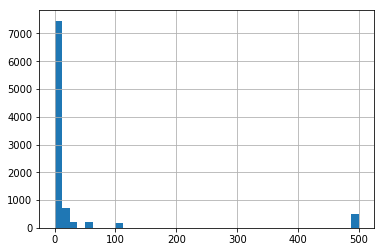

In [61]:
ndf.max_team_size.hist(bins=40)

In [62]:
ndf.max_team_size.value_counts(dropna=False)

5.00      3645
nan       2162
10.00     1912
1.00      1747
15.00      726
500.00     488
50.00      210
25.00      201
100.00     176
0.00       155
Name: max_team_size, dtype: int64

In [63]:
df.max_team_size.fillna(5, inplace=True)

In [64]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
minmaxer = MinMaxScaler()

In [66]:
df['max_team_size_minmaxed'] = df.max_team_size
df['max_team_size_minmaxed'] = minmaxer.fit_transform(df[['max_team_size']])

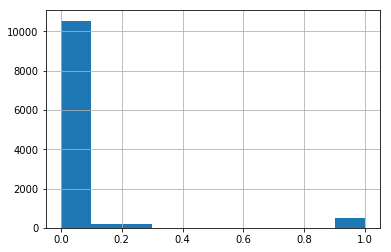

In [67]:
df['max_team_size_minmaxed'].hist()

We can alternatively log transform this feature.

In [68]:
df['log_max_tsize'] = df.max_team_size + 0.01  # push zeros a bit up

In [69]:
df.log_max_tsize = np.log(df.log_max_tsize)

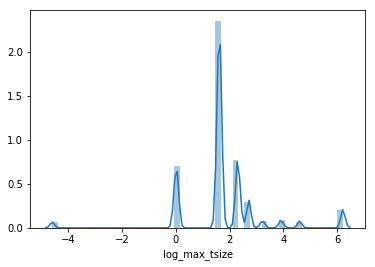

In [70]:
sns.distplot(df.log_max_tsize)

# Feature extraction

## One-hot encoding

Let's find a nice categorical feature to one-hot encode...

In [71]:
odf = df.select_dtypes('object')

In [72]:
odf.shape

(11422, 19)

In [73]:
odf.sample(5)

,marketing_referrer,created_at_fromaccounts,trial_start,churn_state,region_fromaccounts,country_fromaccounts,device_fromaccounts,os_fromaccounts,browser_fromaccounts,payment_currency,created_at_fromusers,became_active_at,city,region_fromusers,country_fromusers,device_fromusers,os_fromusers,gender,DATE
8141,https://auth.monday.com/login,2019-01-01,2019-01-01,none,Sichuan,CN,desktop,windows,chrome,USD,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01
4728,https://www.google.com/,2019-01-01,2019-01-01,none,NaN,US,desktop,windows,chrome,USD,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-03
7302,NaN,2019-01-01,2019-01-29,none,Auvergne-Rhone-Alpes,FR,mobile,ios,generic browser,EUR,2019-01-03,2019-01-03,La Chapelle-Basse-Mer,Pays de la Loire,FR,desktop,mac,F,2019-01-05
9604,https://www.youtube.com/,2019-01-01,2019-03-03,none,Hokkaido,JP,desktop,mac,chrome,USD,2019-01-01,2019-01-01,Obihiro,Hokkaido,JP,desktop,mac,M,2019-01-14
2763,https://auth.monday.com/login,2019-01-01,2019-01-01,none,Sichuan,CN,desktop,windows,chrome,USD,2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-03


In [74]:
odf.os_fromusers.value_counts(dropna=False)

windows      3876
ios          2544
mac          2035
NaN          1856
android       960
chrome_os     104
linux          47
Name: os_fromusers, dtype: int64

Perfect for one-hot encoding!

When we one-hot encode categorical features it is very important to drop one of the features, to avoid [perfect multicolinearity (aka *the dummy variable trap*)](https://www.algosome.com/articles/dummy-variable-trap-regression.html). Since we have `NaNs` in our data, and we do not use the `dummy_na=True` option, a column for them will not be created, and we have effectively dropped the `os_NaN` column. When that is not the case, use `drop_first=True`.

In [75]:
pd.get_dummies(df[['os_fromusers']], prefix='os').head(8)

,os_android,os_chrome_os,os_ios,os_linux,os_mac,os_windows
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1
5,0,0,0,0,0,1
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [76]:
df = pd.concat([df, pd.get_dummies(df[['os_fromusers']], prefix='os')], axis=1)

Remember to drop the original feature!

In [77]:
df.drop('os_fromusers', axis=1, inplace=True)

In [78]:
df.head(5)

,account_id,marketing_referrer,created_at_fromaccounts,trial_start,churn_state,time_diff_fromaccounts,region_fromaccounts,country_fromaccounts,paying,is_gmail_fromaccounts,has_logo,device_fromaccounts,os_fromaccounts,browser_fromaccounts,collection_21_days,trial_period,payment_currency,disable_promotion,max_team_size,min_team_size,billed_users_count,pricing_version,has_domain,lead_score,user_id,created_at_fromusers,is_admin,pending,enabled,became_active_at,time_diff_fromusers,city,region_fromusers,country_fromusers,serial_number,has_photo,device_fromusers,is_gmail_fromusers,campaign_id,first_user_in_account_id,gender,has_phone,DATE,total_events,column_events,board_events,num_of_boards,count_kind_columns,raw_events,group_events,invite_events,import_events,notification_events,new_entry_events,payment_events,inbox_events,communicating_events,non_communicating_events,web_events,ios_events,android_events,desktop_app_events,empty_events,max_team_size_minmaxed,log_max_tsize,os_android,os_chrome_os,os_ios,os_linux,os_mac,os_windows
0,2793496,https://www.bing.com/search?q=basecamp login,2019-01-01,2019-01-01,none,11.00,New South Wales,AU,0.00,1.00,1.00,desktop,windows,microsoft edge,0.00,14.00,AUD,0.00,5.00,2.00,0.00,3.00,0.00,0.00,6181341,2018-12-31,1.00,0.00,1.00,2019-01-01,11.00,Warrawee,New South Wales,AU,1.00,1.00,desktop,1.00,"4,005,514.00","29,837,820.00",M,1.00,2019-01-01,43.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,2.00,33.00,0.00,0.00,0.00,7.00,0.01,1.61,0,0,0,0,0,1
1,2793496,https://www.bing.com/search?q=basecamp login,2019-01-01,2019-01-01,none,11.00,New South Wales,AU,0.00,1.00,1.00,desktop,windows,microsoft edge,0.00,14.00,AUD,0.00,5.00,2.00,0.00,3.00,0.00,0.00,6181341,2018-12-31,1.00,0.00,1.00,2019-01-01,11.00,Warrawee,New South Wales,AU,1.00,1.00,desktop,1.00,"4,005,514.00","29,837,820.00",M,1.00,2019-01-05,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,1.61,0,0,0,0,0,1
2,2793496,https://www.bing.com/search?q=basecamp login,2019-01-01,2019-01-01,none,11.00,New South Wales,AU,0.00,1.00,1.00,desktop,windows,microsoft edge,0.00,14.00,AUD,0.00,5.00,2.00,0.00,3.00,0.00,0.00,6181341,2018-12-31,1.00,0.00,1.00,2019-01-01,11.00,Warrawee,New South Wales,AU,1.00,1.00,desktop,1.00,"4,005,514.00","29,837,820.00",M,1.00,2019-01-02,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,1.61,0,0,0,0,0,1
3,2793496,https://www.bing.com/search?q=basecamp login,2019-01-01,2019-01-01,none,11.00,New South Wales,AU,0.00,1.00,1.00,desktop,windows,microsoft edge,0.00,14.00,AUD,0.00,5.00,2.00,0.00,3.00,0.00,0.00,6181341,2018-12-31,1.00,0.00,1.00,2019-01-01,11.00,Warrawee,New South Wales,AU,1.00,1.00,desktop,1.00,"4,005,514.00","29,837,820.00",M,1.00,2019-01-14,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,1.61,0,0,0,0,0,1
4,2793496,https://www.bing.com/search?q=basecamp login,2019-01-01,2019-01-01,none,11.00,New South Wales,AU,0.00,1.00,1.00,desktop,windows,microsoft edge,0.00,14.00,AUD,0.00,5.00,2.00,0.00,3.00,0.00,0.00,6181341,2018-12-31,1.00,0.00,1.00,2019-01-01,11.00,Warrawee,New South Wales,AU,1.00,1.00,desktop,1.00,"4,005,514.00","29,837,820.00",M,1.00,2019-01-10,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,1.61,0,0,0,0,0,1


## Binning

This is a feature we should leave continous, but just for demonstation, let's assume it makes sense to bin it...
Maybe it would have made sense to bin it into zero and non-zero if we didn't have the `paying` boolean feature.

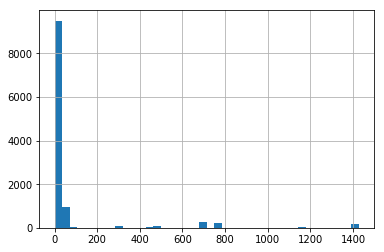

In [79]:
df.collection_21_days.hist(bins=40)

In [80]:
df.collection_21_days = df.collection_21_days.fillna(0)

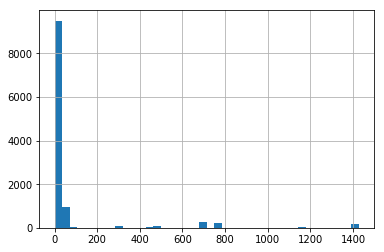

In [81]:
df.collection_21_days.hist(bins=40)

In [82]:
df.collection_binned = pd.cut(
    x=df.collection_21_days,
    bins=[-1,0.1,200, 800, 900000],
    labels=['0','<200','200-800','>800'],
)

/Users/shaypalachy/.pyenv/versions/3.6.5/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


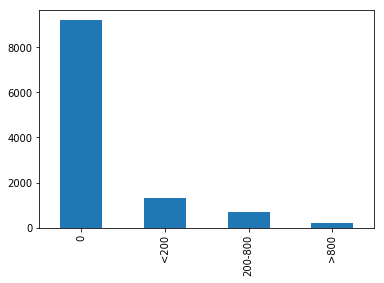

In [83]:
df.collection_binned.value_counts().plot(kind='bar')

We know have a feature which we can one-hot encode to work with!

# Grouping

Let's group our data on `account_id` to get back to one row per account.

In [84]:
grouped = df.groupby('account_id')

In [85]:
df.head(20)

,account_id,marketing_referrer,created_at_fromaccounts,trial_start,churn_state,time_diff_fromaccounts,region_fromaccounts,country_fromaccounts,paying,is_gmail_fromaccounts,has_logo,device_fromaccounts,os_fromaccounts,browser_fromaccounts,collection_21_days,trial_period,payment_currency,disable_promotion,max_team_size,min_team_size,billed_users_count,pricing_version,has_domain,lead_score,user_id,created_at_fromusers,is_admin,pending,enabled,became_active_at,time_diff_fromusers,city,region_fromusers,country_fromusers,serial_number,has_photo,device_fromusers,is_gmail_fromusers,campaign_id,first_user_in_account_id,gender,has_phone,DATE,total_events,column_events,board_events,num_of_boards,count_kind_columns,raw_events,group_events,invite_events,import_events,notification_events,new_entry_events,payment_events,inbox_events,communicating_events,non_communicating_events,web_events,ios_events,android_events,desktop_app_events,empty_events,max_team_size_minmaxed,log_max_tsize,os_android,os_chrome_os,os_ios,os_linux,os_mac,os_windows
0,2793496,https://www.bing.com/search?q=basecamp login,2019-01-01,2019-01-01,none,11.00,New South Wales,AU,0.00,1.00,1.00,desktop,windows,microsoft edge,0.00,14.00,AUD,0.00,5.00,2.00,0.00,3.00,0.00,0.00,6181341,2018-12-31,1.00,0.00,1.00,2019-01-01,11.00,Warrawee,New South Wales,AU,1.00,1.00,desktop,1.00,"4,005,514.00","29,837,820.00",M,1.00,2019-01-01,43.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,2.00,33.00,0.00,0.00,0.00,7.00,0.01,1.61,0,0,0,0,0,1
1,2793496,https://www.bing.com/search?q=basecamp login,2019-01-01,2019-01-01,none,11.00,New South Wales,AU,0.00,1.00,1.00,desktop,windows,microsoft edge,0.00,14.00,AUD,0.00,5.00,2.00,0.00,3.00,0.00,0.00,6181341,2018-12-31,1.00,0.00,1.00,2019-01-01,11.00,Warrawee,New South Wales,AU,1.00,1.00,desktop,1.00,"4,005,514.00","29,837,820.00",M,1.00,2019-01-05,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,1.61,0,0,0,0,0,1
2,2793496,https://www.bing.com/search?q=basecamp login,2019-01-01,2019-01-01,none,11.00,New South Wales,AU,0.00,1.00,1.00,desktop,windows,microsoft edge,0.00,14.00,AUD,0.00,5.00,2.00,0.00,3.00,0.00,0.00,6181341,2018-12-31,1.00,0.00,1.00,2019-01-01,11.00,Warrawee,New South Wales,AU,1.00,1.00,desktop,1.00,"4,005,514.00","29,837,820.00",M,1.00,2019-01-02,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,1.61,0,0,0,0,0,1
3,2793496,https://www.bing.com/search?q=basecamp login,2019-01-01,2019-01-01,none,11.00,New South Wales,AU,0.00,1.00,1.00,desktop,windows,microsoft edge,0.00,14.00,AUD,0.00,5.00,2.00,0.00,3.00,0.00,0.00,6181341,2018-12-31,1.00,0.00,1.00,2019-01-01,11.00,Warrawee,New South Wales,AU,1.00,1.00,desktop,1.00,"4,005,514.00","29,837,820.00",M,1.00,2019-01-14,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,1.61,0,0,0,0,0,1
4,2793496,https://www.bing.com/search?q=basecamp login,2019-01-01,2019-01-01,none,11.00,New South Wales,AU,0.00,1.00,1.00,desktop,windows,microsoft edge,0.00,14.00,AUD,0.00,5.00,2.00,0.00,3.00,0.00,0.00,6181341,2018-12-31,1.00,0.00,1.00,2019-01-01,11.00,Warrawee,New South Wales,AU,1.00,1.00,desktop,1.00,"4,005,514.00","29,837,820.00",M,1.00,2019-01-10,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,1.61,0,0,0,0,0,1
5,2793496,https://www.bing.com/search?q=basecamp login,2019-01-01,2019-01-01,none,11.00,New South Wales,AU,0.00,1.00,1.00,desktop,windows,microsoft edge,0.00,14.00,AUD,0.00,5.00,2.00,0.00,3.00,0.00,0.00,6181341,2018-12-31,1.00,0.00,1.00,2019-01-01,11.00,Warrawee,New South Wales,AU,1.00,1.00,desktop,1.00,"4,005,514.00","29,837,820.00",M,1.00,2019-01-03,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,1.61,0,0,0,0,0,1
6,2793497,NaN,2019-01-01,2019-01-01,none,nan,New Jersey,US,0.00,1.00,1.00,mobile,ios,missing,0.00,14.0

We can now use this object to start building some of the features.

Per-account features we can just reduce by taking the first value...

In [86]:
per_account_features = [
    'is_gmail_fromaccounts', 'has_logo', 'collection_21_days', 'billed_users_count',
    'log_max_tsize', 'lead_score']

In [87]:
firsts = grouped[per_account_features].first()

Numerical features that might be different per user, event or subscription, we need to summarize in an appropriate way.

For example, our dummy os variables come from the user table, so taking their mean when reducing will simply give us the ratio of users using each os in the organization. The same is true for other per-user features.

In [88]:
mean_features = [
    'os_android', 'os_chrome_os', 'os_ios', 'os_linux', 'os_mac', 'os_windows',
    'has_photo', 'gender', 'has_phone'
]

In [89]:
means = grouped[mean_features].mean().add_suffix('_avg')

In the case of events the total number might interest us instead:

In [90]:
sum_features = [
    'total_events', 'notification_events', 'new_entry_events', 'payment_events',
    'inbox_events', 'communicating_events', 'non_communicating_events', 'web_events',
    'ios_events', 'android_events', 'desktop_app_events', 'empty_events']

In [91]:
sums = grouped[sum_features].sum().add_suffix('_sum')

In [92]:
new_df = pd.concat([firsts, means, sums], axis=1)

In [93]:
new_df.head(10)

,is_gmail_fromaccounts,has_logo,collection_21_days,billed_users_count,log_max_tsize,lead_score,os_android_avg,os_chrome_os_avg,os_ios_avg,os_linux_avg,os_mac_avg,os_windows_avg,has_photo_avg,has_phone_avg,total_events_sum,notification_events_sum,new_entry_events_sum,payment_events_sum,inbox_events_sum,communicating_events_sum,non_communicating_events_sum,web_events_sum,ios_events_sum,android_events_sum,desktop_app_events_sum,empty_events_sum
account_id,,,,,,,,,,,,,,,,,,,,,,,,,,
2793496,1.00,1.00,0.00,0.00,1.61,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,53.00,0.00,1.00,0.00,1.00,0.00,2.00,33.00,0.00,0.00,0.00,7.00
2793497,1.00,1.00,0.00,0.00,1.61,0.00,0.45,0.00,0.55,0.00,0.00,0.00,1.00,1.00,749.00,6.00,27.00,0.00,0.00,7.00,27.00,0.00,"1,138.00",183.00,0.00,7.00
2793498,1.00,1.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,72.00,0.00,1.00,0.00,1.00,1.00,5.00,52.00,0.00,0.00,0.00,9.00
2793499,1.00,1.00,0.00,0.00,1.61,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,97.00,0.00,2.00,0.00,0.00,0.00,2.00,0.00,0.00,42.00,0.00,7.00
2793500,1.00,1.00,0.00,0.00,0.01,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,158.00,0.00,1.00,0.00,4.00,0.00,23.00,139.00,0.00,0.00,0.00,9.00
2793501,0.00,1.00,0.00,0.00,1.61,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,67.00,0.00,1.00,0.00,1.00,1.00,2.00,56.00,0.00,0.00,0.00,7.00
2793502,1.00,1.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,316.00,0.00,1.00,0.00,1.00,1.00,75.00,292.00,0.00,0.00,0.00,17.00
2793503,1.00,1.00,0.00,0.00,1.61,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,60.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,19.00,0.00,3.00
2793504,1.00,1.00,0.00,0.00,-4.61,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,288.00,0.00,3.00,0.00,3.00,1.00,6.00,155.00,92.00,0.00,0.00,21.00


Now let's scale all features.

In [94]:
from sklearn.preprocessing import MinMaxScaler
minmaxer = MinMaxScaler()

In [95]:
new_df[new_df.columns] = minmaxer.fit_transform(new_df)

In [96]:
new_df.shape

(1001, 26)

In [97]:
new_df.head(10)

,is_gmail_fromaccounts,has_logo,collection_21_days,billed_users_count,log_max_tsize,lead_score,os_android_avg,os_chrome_os_avg,os_ios_avg,os_linux_avg,os_mac_avg,os_windows_avg,has_photo_avg,has_phone_avg,total_events_sum,notification_events_sum,new_entry_events_sum,payment_events_sum,inbox_events_sum,communicating_events_sum,non_communicating_events_sum,web_events_sum,ios_events_sum,android_events_sum,desktop_app_events_sum,empty_events_sum
account_id,,,,,,,,,,,,,,,,,,,,,,,,,,
2793496,1.00,0.00,0.00,0.00,0.57,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2793497,1.00,0.00,0.00,0.00,0.57,0.00,0.45,0.00,0.55,0.00,0.00,0.00,0.00,0.00,0.01,0.04,0.02,0.00,0.00,0.00,0.00,0.00,0.17,0.01,0.00,0.00
2793498,1.00,0.00,0.00,0.00,0.43,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2793499,1.00,0.00,0.00,0.00,0.57,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2793500,1.00,0.00,0.00,0.00,0.43,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2793501,0.00,0.00,0.00,0.00,0.57,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2793502,1.00,0.00,0.00,0.00,0.43,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2793503,1.00,0.00,0.00,0.00,0.57,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2793504,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.01


That's it for some very basic feature extraction! You'll probably see basic ways to handle time data in our more in-depth preprocessing workshop on the first night of DataHack 2019!

# Dimensionality reduction

Let's see if the labels are somewhat separated in the resulting feature space.

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1001 samples in 0.002s...
[t-SNE] Computed neighbors for 1001 samples in 0.071s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1001
[t-SNE] Computed conditional probabilities for sample 1001 / 1001
[t-SNE] Mean sigma: 0.002760
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.834229
[t-SNE] KL divergence after 300 iterations: 0.263996
t-SNE done! Time elapsed: 3.440955877304077 seconds


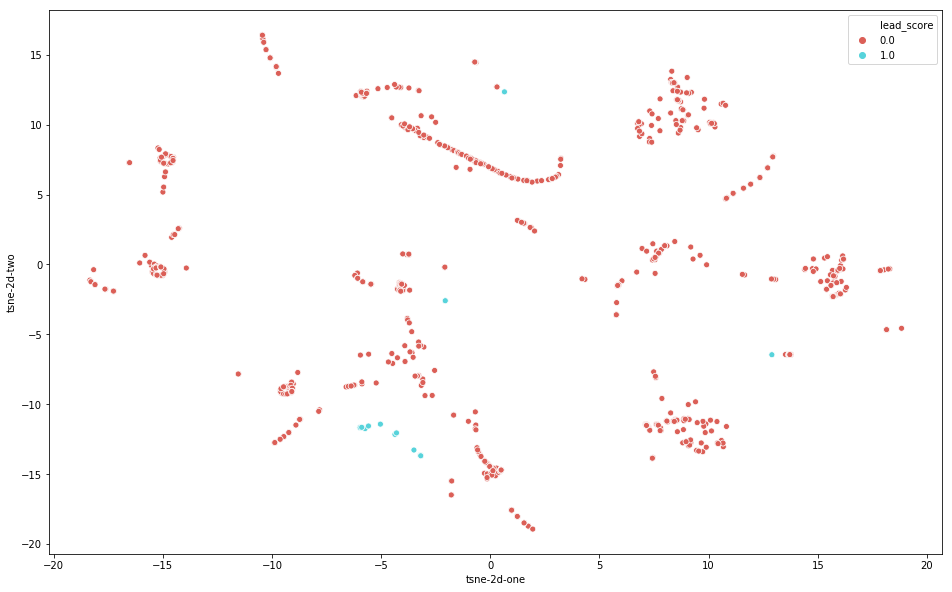

In [98]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(new_df.values)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
tsne = new_df[['lead_score']].copy(deep=True)
tsne['tsne-2d-one'] = tsne_results[:,0]
tsne['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette("hls", 2),
    hue='lead_score',
    data=tsne,
    legend="full",
    alpha=1,
)

### Not bad!

# Feature selection

Select the best 20 features by chi-squared stats between each feature and labels.

In [99]:
X = new_df.drop('lead_score', axis=1)
y = new_df[['lead_score']]

In [100]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=20)
selector.fit(X, y)
col_indices = selector.get_support(indices=True)
# Create new dataframe with only desired columns, or overwrite existing
selected_X = X[X.columns[col_indices]]
selected_df = pd.concat([selected_X, y], axis=1)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1001 samples in 0.001s...
[t-SNE] Computed neighbors for 1001 samples in 0.047s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1001
[t-SNE] Computed conditional probabilities for sample 1001 / 1001
[t-SNE] Mean sigma: 0.002467
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.256073
[t-SNE] KL divergence after 300 iterations: 0.259954
t-SNE done! Time elapsed: 2.293794870376587 seconds


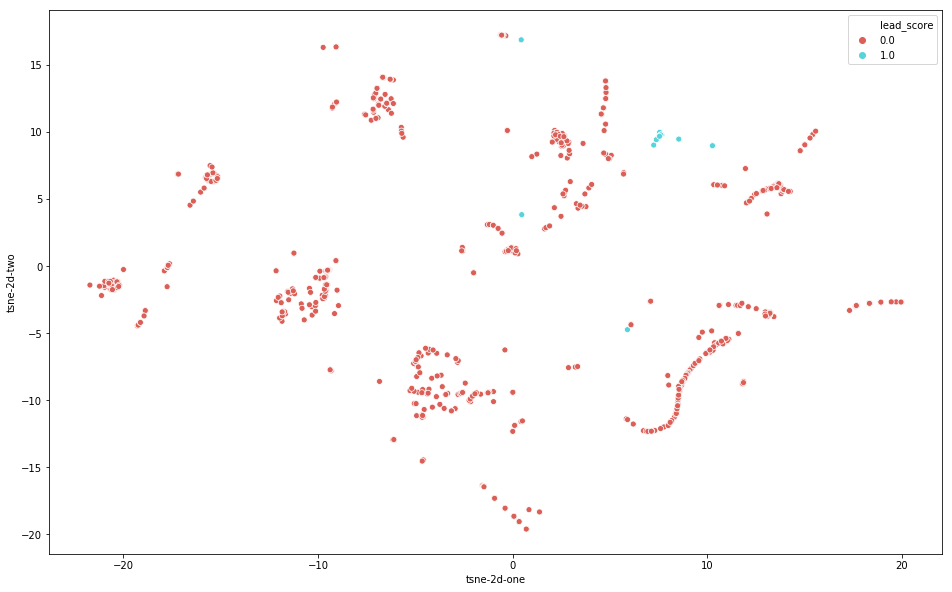

In [101]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(selected_df.values)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
tsne = new_df[['lead_score']].copy(deep=True)
tsne['tsne-2d-one'] = tsne_results[:,0]
tsne['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    palette=sns.color_palette("hls", 2),
    hue='lead_score',
    data=tsne,
    legend="full",
    alpha=1,
)

### Let's save what we've done so we can use it to train our machine learning models!

In [102]:
# selected_df.to_csv('data/monday_datalearn.csv')